Original shape: (632, 474)


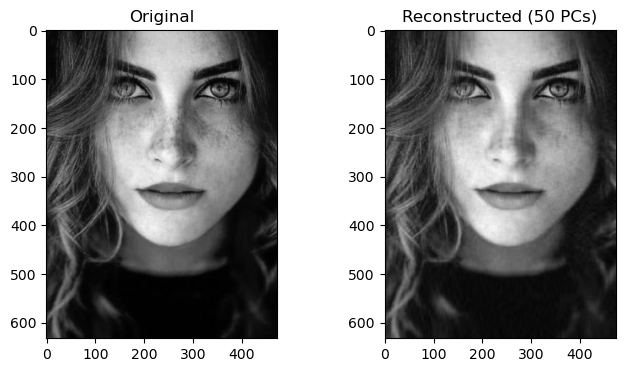

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# 1. Load image (grayscale for simplicity)
img = io.imread("pca.jpeg")
if img.ndim == 3:  # convert to grayscale if RGB
    img = color.rgb2gray(img)

print("Original shape:", img.shape)

# 2. Apply PCA on rows
pca = PCA(n_components=50)  # keep 50 components
transformed = pca.fit_transform(img)

# 3. Reconstruct image
reconstructed = pca.inverse_transform(transformed)

# 4. Show original vs reconstructed
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Reconstructed (50 PCs)")
plt.imshow(reconstructed, cmap='gray')
plt.show()

Decision Tree Test Accuracy: 1.0


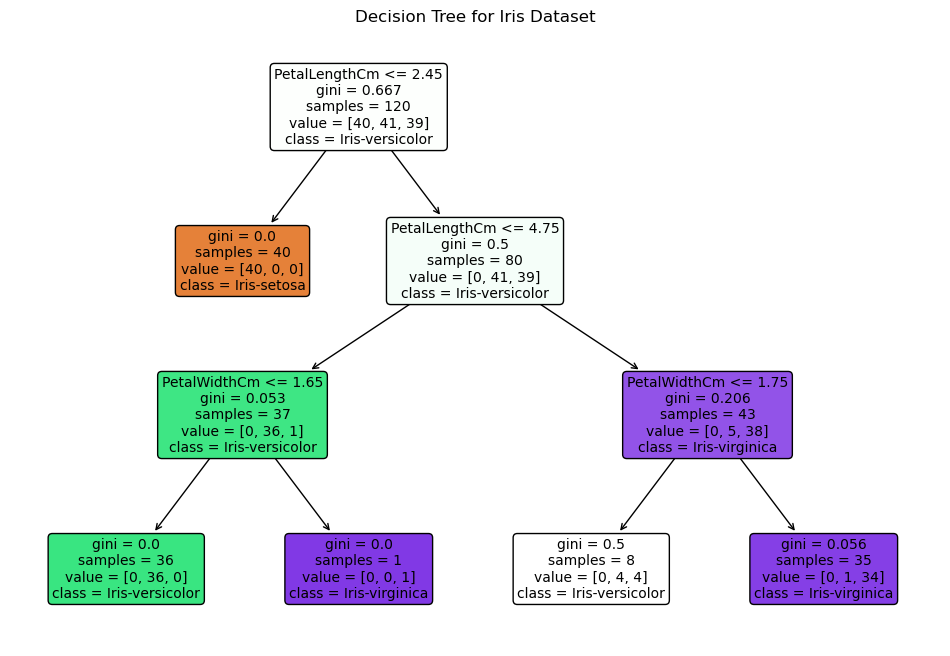

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris_df = pd.read_csv('iris.csv')

# Features and target
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[feature_columns]
y = iris_df['Species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Test accuracy
print("Decision Tree Test Accuracy:", dt.score(X_test, y_test))

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=feature_columns, class_names=dt.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Iris Dataset")
plt.show()


Test accuracy: 1.0


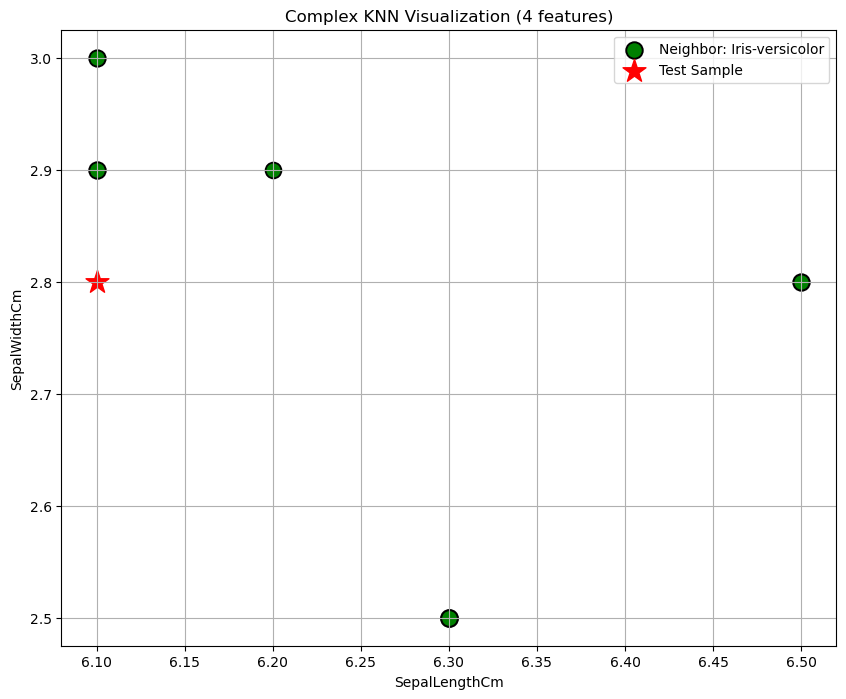

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import numpy as np

# Load iris dataset
iris_df = pd.read_csv('iris.csv')
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[feature_columns].values
y = iris_df['Species'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test accuracy:", knn.score(X_test, y_test))

# Find nearest neighbors for first test sample
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train)
sample = X_test[0].reshape(1, -1)
distances, indices = neigh.kneighbors(sample)

# Flatten neighbors
neighbor_points = X_train[indices].reshape(-1, X_train.shape[1])
neighbor_labels = y_train[indices].flatten()

# Define species colors
species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}
neighbor_colors = [species_colors[label] for label in neighbor_labels]
sample_color = 'red'

# Scatter plot using 4 features
plt.figure(figsize=(10,8))
for i, point in enumerate(neighbor_points):
    plt.scatter(point[0], point[1], 
                s=point[2]*30,          # PetalLengthCm as size
                edgecolors='k', 
                linewidths=point[3],     # PetalWidthCm as edge thickness
                color=neighbor_colors[i], 
                label=f'Neighbor: {neighbor_labels[i]}' if i==0 else "")

# Plot test sample
plt.scatter(sample[0,0], sample[0,1], color=sample_color, s=300, marker='*', label='Test Sample')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Complex KNN Visualization (4 features)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import pandas as pd

data = pd.read_csv("housing.csv")
print(data.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

data = pd.read_csv("housing.csv")
print("Dataset shape:", data.shape)
print(data.head())



X_lin = data.drop("price", axis=1, errors="ignore")
y_lin = data["price"]


X_lin = X_lin.select_dtypes(include=[np.number]).drop(columns=["id","zipcode"], errors="ignore")


X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)


y_pred_lin = lin_reg.predict(X_test_lin)


print("\n--- Linear Regression Results ---")
print("RMSE:", np.sqrt(mean_squared_error(y_test_lin, y_pred_lin)))
print("R2 Score:", r2_score(y_test_lin, y_pred_lin))


median_value = data["price"].median()
y_log = (data["price"] > median_value).astype(int)

X_log = data.drop("price", axis=1, errors="ignore")
X_log = X_log.select_dtypes(include=[np.number]).drop(columns=["id","zipcode"], errors="ignore")


X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)


y_pred_log = log_reg.predict(X_test_log)


print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log))






Dataset shape: (21613, 21)
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode 

C:\Users\Supriya Balakrishna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


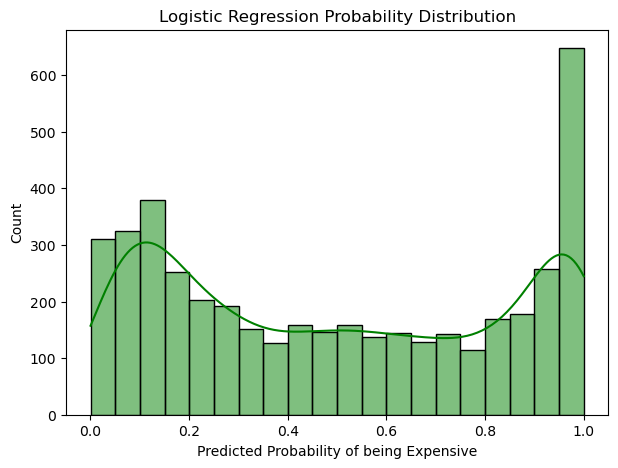

In [12]:
# Logistic Regression - Probability Distribution
y_proba = log_reg.predict_proba(X_test_log)[:,1]
plt.figure(figsize=(7,5))
sns.histplot(y_proba, bins=20, kde=True, color="green")
plt.xlabel("Predicted Probability of being Expensive")
plt.title("Logistic Regression Probability Distribution")
plt.show()


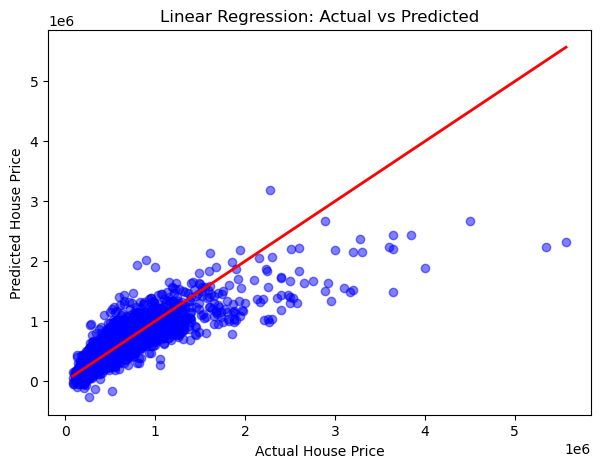

In [19]:
# Linear Regression - Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.5, color="blue")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot(
    [y_test_lin.min(), y_test_lin.max()],
    [y_test_lin.min(), y_test_lin.max()],
    color="red", linewidth=2
)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# 1. Load image (grayscale for simplicity)
img = io.imread("pca.jpeg")
if img.ndim == 3:
    img = color.rgb2gray(img)

print("Original shape:", img.shape)

# 2. Flatten the image to 1D array for PCA
rows, cols = img.shape
img_flat = img.flatten().reshape(1, -1)  # shape (1, rows*cols)

# 3. Apply PCA
n_components = 50
pca = PCA(n_components=n_components)
transformed = pca.fit_transform(img_flat)  # reduce dimensions

# 4. Reconstruct the image
reconstructed_flat = pca.inverse_transform(transformed)
reconstructed = reconstructed_flat.reshape(rows, cols)

# Clip values to [0,1] for proper display
reconstructed = np.clip(reconstructed, 0, 1)

# 5. Show original vs reconstructed
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Reconstructed ({n_components} PCs)")
plt.imshow(reconstructed, cmap='gray')
plt.axis('off')
plt.show()


Original shape: (632, 474)


ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv("data.csv")

print("First 5 rows of dataset:")
print(data.head())
print("\nClass distribution in target column:")
print(data.iloc[:, -1].value_counts())

# Assume last column is target
X = data.iloc[:, :-1]   # Features
y = data.iloc[:, -1]    # Target

# Split dataset (without stratify because of rare class issue)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Output
print("\nPredictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


First 5 rows of dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Class distribution in target column:
Salary
39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: count, dtype: int64

Predictions: [116969.  66029. 101302.  66029.  54445.  63218. 121872. 105582.  55794.]
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

     54445.0       0.00      0.00      0.00       0.0
     55794.0       0.00      0.00      0.00       0.0
     56957.0       0.00   

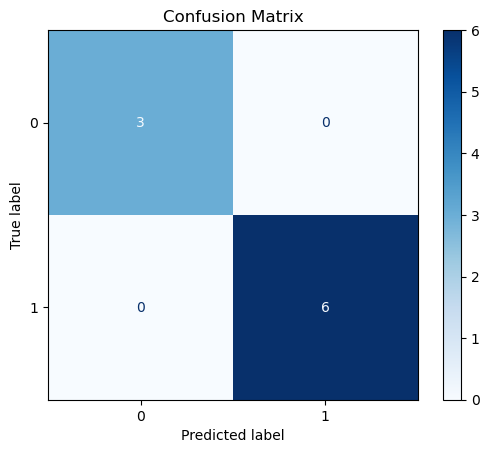

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



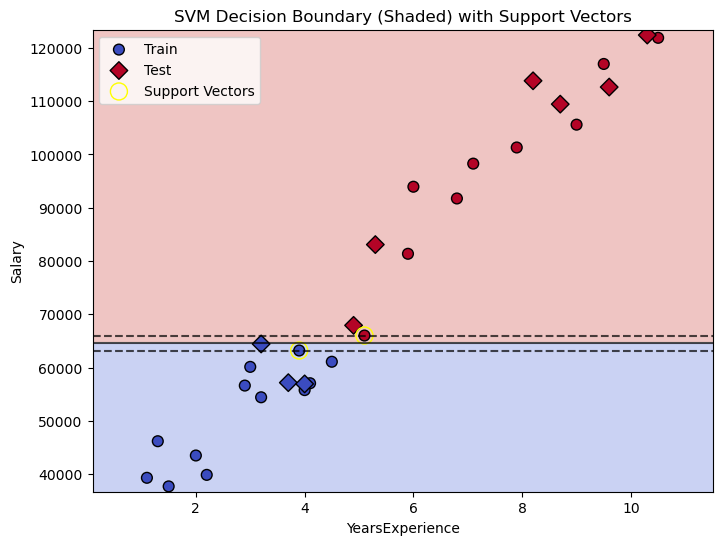

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Load dataset
file_path = "data.csv"
data = pd.read_csv(file_path)

# Convert regression target into binary classification (High salary vs Low salary)
median_salary = data["Salary"].median()
data["HighSalary"] = (data["Salary"] > median_salary).astype(int)

# Features and target
features = data[["YearsExperience", "Salary"]]   # keep as DataFrame
target = data["HighSalary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Train SVM with linear kernel
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# ✅ Predictions (DataFrame keeps feature names)
y_pred = svm_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Performance Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Classification Report
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------
# Decision boundary plotting
# ------------------------
plt.figure(figsize=(8,6))

# Mesh grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(features["YearsExperience"].min()-1, features["YearsExperience"].max()+1, 300),
    np.linspace(features["Salary"].min()-1000, features["Salary"].max()+1000, 300)
)
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features.columns)

# Predict over grid
Z = svm_model.predict(grid)
Z = Z.reshape(xx.shape)

# ✅ Shaded regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Training points
plt.scatter(
    X_train["YearsExperience"], 
    X_train["Salary"], 
    c=y_train, cmap="coolwarm", s=60, edgecolors="k", label="Train"
)

# Test points
plt.scatter(
    X_test["YearsExperience"],
    X_test["Salary"],
    c=y_test, cmap="coolwarm", s=80, edgecolors="black", marker="D", label="Test"
)

# Support vectors
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=150, linewidth=1, facecolors="none", edgecolors="yellow", label="Support Vectors"
)

# Decision boundary lines
Z_decision = svm_model.decision_function(grid).reshape(xx.shape)
plt.contour(xx, yy, Z_decision, colors="k", levels=[-1, 0, 1],
            alpha=0.7, linestyles=["--", "-", "--"])

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("SVM Decision Boundary (Shaded) with Support Vectors")
plt.legend()
plt.show()


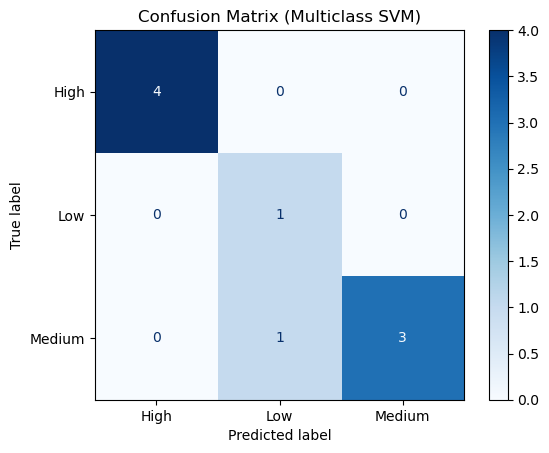

Accuracy : 0.8888888888888888

Detailed Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       0.50      1.00      0.67         1
      Medium       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.83      0.92      0.84         9
weighted avg       0.94      0.89      0.90         9



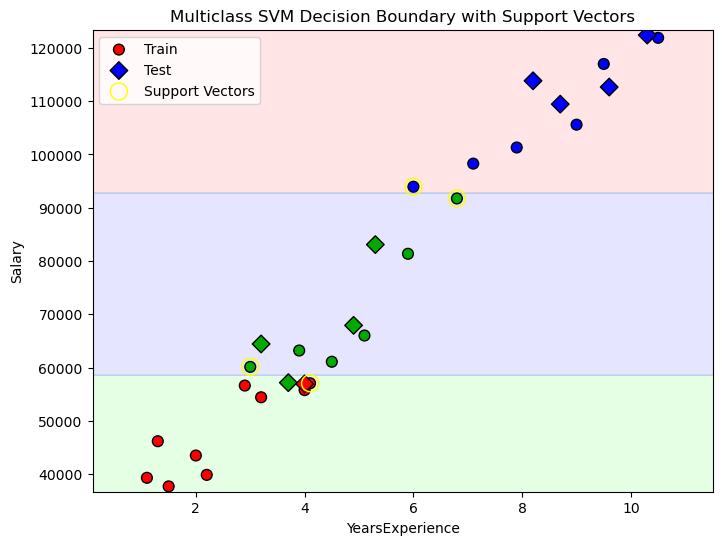

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score
)
from matplotlib.colors import ListedColormap

# ------------------------
# Load dataset
# ------------------------
file_path = "data.csv"
data = pd.read_csv(file_path)

# ------------------------
# Convert Salary into MULTICLASS (Low, Medium, High)
# ------------------------
data["SalaryClass"] = pd.qcut(data["Salary"], q=3, labels=["Low", "Medium", "High"])

# Features and target
features = data[["YearsExperience", "Salary"]]
target = data["SalaryClass"]

# ------------------------
# Train-test split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# ------------------------
# Train Multiclass SVM
# ------------------------
svm_model = SVC(kernel="linear", decision_function_shape="ovr")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# ------------------------
# Confusion Matrix
# ------------------------
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Multiclass SVM)")
plt.show()

# ------------------------
# Performance Metrics
# ------------------------
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------
# Decision boundary plotting (for 2D features)
# ------------------------
plt.figure(figsize=(8,6))

# Create mesh grid for plotting
xx, yy = np.meshgrid(
    np.linspace(features["YearsExperience"].min()-1, features["YearsExperience"].max()+1, 300),
    np.linspace(features["Salary"].min()-1000, features["Salary"].max()+1000, 300)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features.columns)

# Predict over grid (convert string labels → numeric codes)
Z = svm_model.predict(grid)
Z = pd.Series(Z).astype("category").cat.codes.values
Z = Z.reshape(xx.shape)

# Custom colormap for 3 classes
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])  # background regions
cmap_bold = ListedColormap(["#FF0000", "#00AA00", "#0000FF"])   # points

# Plot shaded decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Training points
plt.scatter(
    X_train["YearsExperience"], 
    X_train["Salary"], 
    c=y_train.cat.codes, cmap=cmap_bold, s=60, edgecolors="k", label="Train"
)

# Test points
plt.scatter(
    X_test["YearsExperience"],
    X_test["Salary"],
    c=y_test.cat.codes, cmap=cmap_bold, s=80, edgecolors="black", marker="D", label="Test"
)

# Support vectors
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=150, linewidth=1, facecolors="none", edgecolors="yellow", label="Support Vectors"
)

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Multiclass SVM Decision Boundary with Support Vectors")
plt.legend()
plt.show()


In [3]:
# ------------------------
# Visualizing OvR Hyperplanes + Margins (Multiclass SVM)
# ------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Background decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Training points
plt.scatter(
    X_train["YearsExperience"],
    X_train["Salary"],
    c=y_train.cat.codes,
    cmap=cmap_bold,
    s=60,
    edgecolors="k",
    label="Train"
)

# Test points
plt.scatter(
    X_test["YearsExperience"],
    X_test["Salary"],
    c=y_test.cat.codes,
    cmap=cmap_bold,
    s=80,
    edgecolors="black",
    marker="D",
    label="Test"
)

# Support vectors
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=150,
    linewidth=1,
    facecolors="none",
    edgecolors="yellow",
    label="Support Vectors"
)

# ------------------------
# Plot OvR hyperplanes + margins
# ------------------------
colors = ["red", "green", "blue"]  # Low, Medium, High
x_vals = np.linspace(features["YearsExperience"].min()-1,
                     features["YearsExperience"].max()+1, 300)

for i, (w, b) in enumerate(zip(svm_model.coef_, svm_model.intercept_)):
    # Hyperplane: w0*x + w1*y + b = 0  →  y = -(w0*x + b)/w1
    y_vals = -(w[0] * x_vals + b) / w[1]
    y_vals_pos = -(w[0] * x_vals + b - 1) / w[1]  # +1 margin
    y_vals_neg = -(w[0] * x_vals + b + 1) / w[1]  # -1 margin

    plt.plot(x_vals, y_vals, linestyle="--", color=colors[i],
             label=f"Hyperplane ({svm_model.classes_[i]})")
    plt.plot(x_vals, y_vals_pos, linestyle=":", color=colors[i])
    plt.plot(x_vals, y_vals_neg, linestyle=":", color=colors[i])

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Multiclass SVM (OvR): Decision Regions + Hyperplanes + Margins")
plt.legend()
plt.show()


NameError: name 'xx' is not defined

<Figure size 1000x700 with 0 Axes>

Accuracy: 0.54


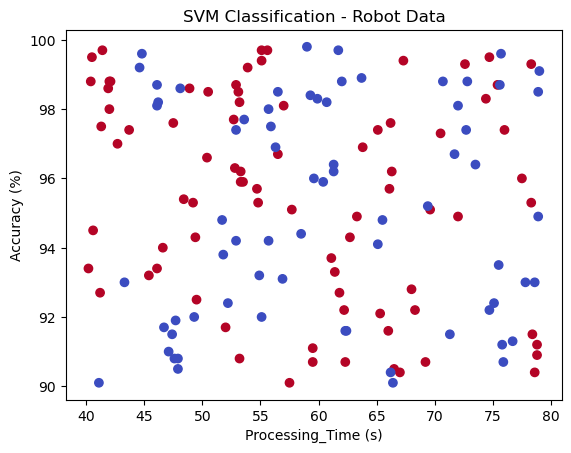

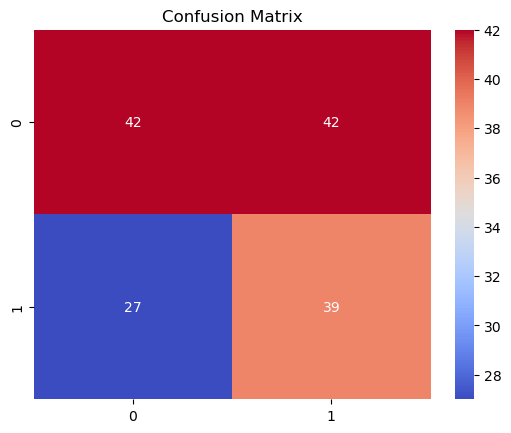

In [3]:
# -----------------------------
# 🤖 Support Vector Machine (SVM) - Robot Dataset
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# 1️⃣ Load dataset
df = pd.read_csv("robot.csv")

# 2️⃣ Select numeric features and target
# Using Processing_Time and Accuracy to predict Obstacle_Detected
X = df[['Processing_Time (s)', 'Accuracy (%)']]
y = df['Obstacle_Detected']    # Target: Yes / No

# 3️⃣ Convert categorical target to numbers
y = y.map({'Yes': 1, 'No': 0})

# 4️⃣ Split data
x_t, x_e, y_t, y_e = train_test_split(X, y, test_size=0.3, random_state=42)

# 5️⃣ Train model
model = SVC(kernel='rbf', gamma='auto')
model.fit(x_t, y_t)

# 6️⃣ Predict
y_pred = model.predict(x_e)

# 7️⃣ Evaluate
print("Accuracy:", accuracy_score(y_e, y_pred))

# 8️⃣ Visualization
plt.scatter(x_e['Processing_Time (s)'], x_e['Accuracy (%)'], c=y_pred, cmap='coolwarm')
plt.title("SVM Classification - Robot Data")
plt.xlabel("Processing_Time (s)")
plt.ylabel("Accuracy (%)")
plt.show()

# 9️⃣ Confusion Matrix
cm = confusion_matrix(y_e, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()


Accuracy: 1.0


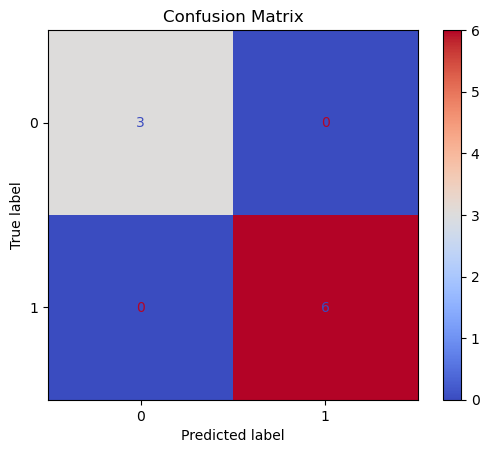

C:\Users\Supriya Balakrishna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


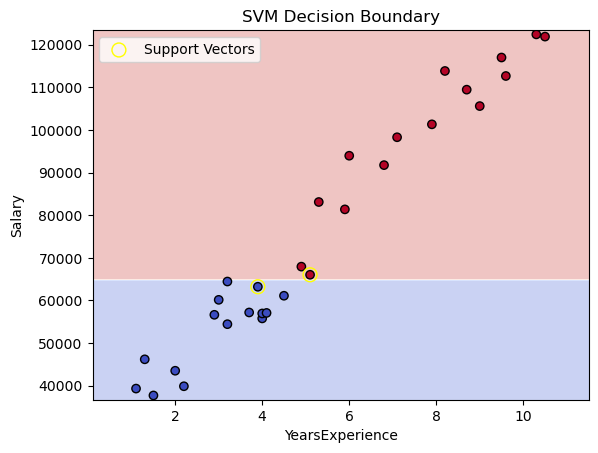

In [7]:
# -----------------------------
# 💠 SVM - Simple Version
# -----------------------------

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1️⃣ Load & prepare data
df = pd.read_csv("data.csv")
df["HighSalary"] = (df["Salary"] > df["Salary"].median()).astype(int)
X, y = df[["YearsExperience", "Salary"]], df["HighSalary"]

# 2️⃣ Split & train
x_t, x_e, y_t, y_e = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel="linear").fit(x_t, y_t)
y_pred = model.predict(x_e)

# 3️⃣ Accuracy + Confusion Matrix
print("Accuracy:", accuracy_score(y_e, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_e, y_pred)).plot(cmap="coolwarm")
plt.title("Confusion Matrix")
plt.show()

# 4️⃣ Decision Boundary
xx, yy = np.meshgrid(
    np.linspace(X.iloc[:,0].min()-1, X.iloc[:,0].max()+1, 200),
    np.linspace(X.iloc[:,1].min()-1000, X.iloc[:,1].max()+1000, 200)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="coolwarm", edgecolors="k")
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=100, facecolors="none", edgecolors="yellow", label="Support Vectors")
plt.title("SVM Decision Boundary")
plt.xlabel("YearsExperience"); plt.ylabel("Salary"); plt.legend(); plt.show()


Accuracy: 0.8888888888888888


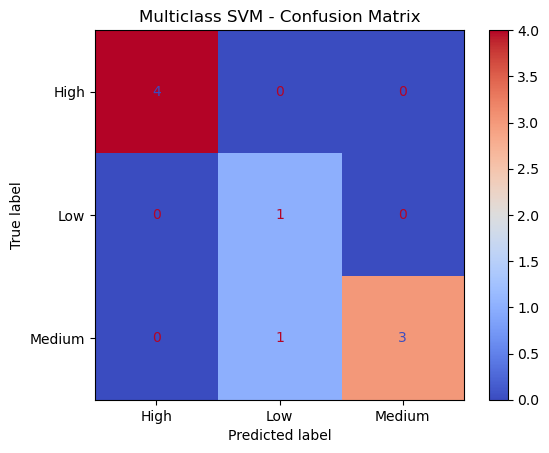

C:\Users\Supriya Balakrishna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


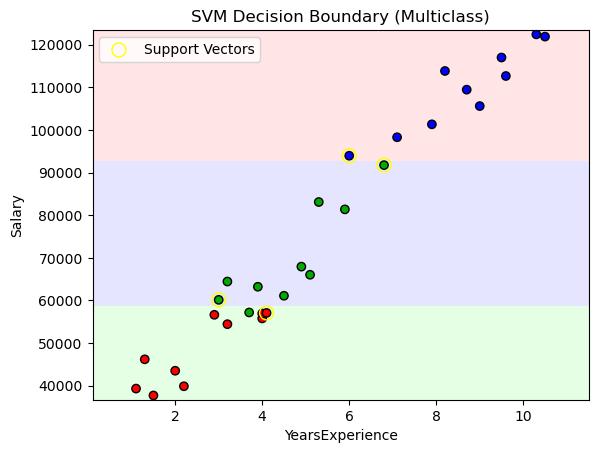

In [9]:
# -----------------------------
# 💠 Multiclass SVM (Compact)
# -----------------------------

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from matplotlib.colors import ListedColormap

# 1️⃣ Load & prepare data
df = pd.read_csv("data.csv")
df["SalaryClass"] = pd.qcut(df["Salary"], 3, labels=["Low", "Medium", "High"])
X, y = df[["YearsExperience", "Salary"]], df["SalaryClass"]

# 2️⃣ Split & train
x_t, x_e, y_t, y_e = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel="linear", decision_function_shape="ovr").fit(x_t, y_t)
y_pred = model.predict(x_e)

# 3️⃣ Accuracy + Confusion Matrix
print("Accuracy:", accuracy_score(y_e, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_e, y_pred, labels=model.classes_),
                       display_labels=model.classes_).plot(cmap="coolwarm")
plt.title("Multiclass SVM - Confusion Matrix")
plt.show()

# 4️⃣ Decision Boundary
xx, yy = np.meshgrid(
    np.linspace(X.iloc[:,0].min()-1, X.iloc[:,0].max()+1, 200),
    np.linspace(X.iloc[:,1].min()-1000, X.iloc[:,1].max()+1000, 200)
)
Z = pd.Series(model.predict(np.c_[xx.ravel(), yy.ravel()])).astype("category").cat.codes.values
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold  = ListedColormap(["#FF0000", "#00AA00", "#0000FF"])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X["YearsExperience"], X["Salary"], c=y.cat.codes, cmap=cmap_bold, edgecolors="k")
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=100, facecolors="none", edgecolors="yellow", label="Support Vectors")
plt.title("SVM Decision Boundary (Multiclass)")
plt.xlabel("YearsExperience"); plt.ylabel("Salary"); plt.legend(); plt.show()


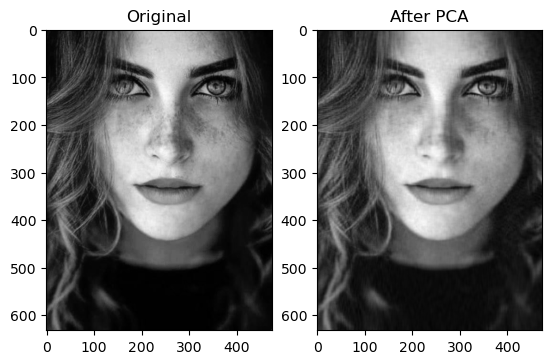

In [15]:
# 🌈 PCA Image Compression (Very Simple)

from sklearn.decomposition import PCA
from skimage import io, color
import matplotlib.pyplot as plt

# 1️⃣ Read image and make it gray
img = io.imread("pca.jpeg")
if img.ndim == 3:
    img = color.rgb2gray(img)

# 2️⃣ Apply PCA (keep 50 features)
pca = PCA(50)
compressed = pca.fit_transform(img)

# 3️⃣ Rebuild image
restored = pca.inverse_transform(compressed)

# 4️⃣ Show both images
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("After PCA")
plt.imshow(restored, cmap='gray')
plt.show()


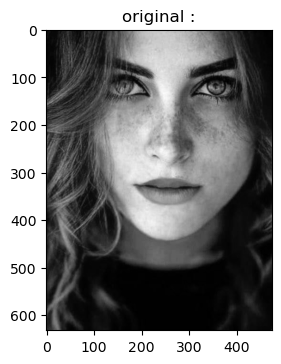

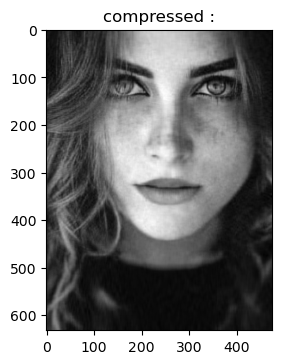

In [33]:
from sklearn.decomposition import PCA
from skimage import io,color
import matplotlib.pyplot as plt
img = io.imread("pca.jpeg")
if img.ndim == 3:
    img = color.rgb2gray(img)

pca = PCA(30)
comp = pca.fit_transform(img)
c = pca.inverse_transform(comp)
plt.subplot(1,2,1)
plt.title("original :")
plt.imshow(img,cmap='grey')
plt.show()

plt.subplot(1,2,1)
plt.title("compressed :")
plt.imshow(restored,cmap='grey')
plt.show()


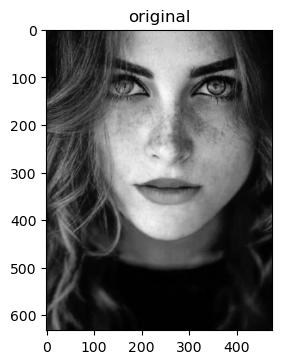

In [45]:
from sklearn.decomposition import PCA
from skimage import io,color
import matplotlib.pyplot as plt
img = io.imread('pca.jpeg')
if img.ndim == 3:
   img = color.rgb2gray(img)
pca = PCA(50)
r = pca.fit_transform(img)
i = pca.inverse_transform(r)
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img,cmap='gray')

In [53]:
from sklearn.decomposition import PCA
from skimage import io,color
import matplotlib.pyplot as plt
img = io.imread('pca.jpeg')
if img.ndim == 3:
    img = color.rgb2gray(img)

pca = PCA(30)
r = pca.fit_transform(img)
i = pca.inverse_transform(r)
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img,cmap = 'gray')

plt.subplot(1,2,1)
plt.title("compressed")
plt.imshow(i,cmap='warm')
